In [2]:
#Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [3]:
#Upload de arquivo de forma permanente e criação do nosso DataFrame
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/datasets/AdventureWorks.xlsx")

In [4]:
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [8]:
#Quantidade de linhas e colunas
df.shape

(904, 16)

In [9]:
#Verificando os tipos de dados
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [10]:
#Qual a Receita total?
df["Valor Venda"].sum()

5984606.1426

In [11]:
#Qual o custo Total? Precisamos calcular o custo total primeiro que não temos pronto em nossa tabela. Vamos nomear como coluna de custo.
df["custo"] = df["Custo Unitário"].mul(df["Quantidade"])

In [12]:
#Conferindo a criação da coluna custo, mostrando o cabeçalho da tabela
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48


In [13]:
#Qual o custo Total? Arredondando para mostrar somente duas casas decimais
round(df["custo"].sum(), 2)

2486783.05

In [14]:
#Agora que temos a receita total e o custo total, podemos calcular o Lucro total
#Vamos criar a coluna Lucro que será Receita - Custo
df["lucro"]  = df["Valor Venda"] - df["custo"]

In [15]:
#Conferindo a criação da coluna lucro, mostrando o cabeçalho da tabela
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52


In [16]:
#Calculando o Lucro Total e arredondando para duas casas decimais
round(df["lucro"].sum(),2)

3497823.09

In [21]:
#Criando uma coluna com total de dias para enviar o produto que chamaremos de Tempo_envio
df["Tempo_envio"] = df["Data Envio"] - df["Data Venda"]

In [22]:
#Conferindo a criação da coluna Tempo_envio, mostrando o cabeçalho da tabela
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20 days


**Temos que calcular a média de tempo de envio por cada marca que a empresa trabalha.**

In [23]:
#Atenção: A coluna Tempo_envio atualmente é uma string. Precisamos alterar o seu tipo para numérico a fim de produzir os cálculos de tempo.
df["Tempo_envio"] = (df["Data Envio"] - df["Data Venda"]).dt.days

In [24]:
#Conferindo a alteração do tipo da coluna Tempo_envio, mostrando o cabeçalho da tabela
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20


In [25]:
#Verificando o tipo da coluna Tempo_envio
df["Tempo_envio"].dtype

dtype('int64')

In [27]:
#Média do tempo de envio em dias por Marca
df.groupby("Marca")["Tempo_envio"].mean()

Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: Tempo_envio, dtype: float64

## **Missing Values**

In [28]:
#Verificando se temos dados faltantes em nossa base de dados
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
custo             0
lucro             0
Tempo_envio       0
dtype: int64

# Calculando o Lucro por e por Marca

In [29]:
#Vamos agrupar os dados por ano e marca
df.groupby([df["Data Venda"].dt.year, "Marca"])["lucro"].sum()

Data Venda  Marca          
2008        Adventure Works    3.066412e+05
            Contoso            5.641600e+04
            Fabrikam           1.557021e+06
2009        Adventure Works    4.053951e+05
            Contoso            1.382590e+05
            Fabrikam           1.034091e+06
Name: lucro, dtype: float64

In [30]:
#Alterando a forma da visualização do cálculo do lucro (Retirando a notação científica)
pd.options.display.float_format = '{:20,.2f}'.format

In [31]:
#Para deixar claro, vamos calcular novamente o lucro por ano e por marca
df.groupby([df["Data Venda"].dt.year, "Marca"])["lucro"].sum()

Data Venda  Marca          
2008        Adventure Works             306,641.16
            Contoso                      56,416.00
            Fabrikam                  1,557,020.55
2009        Adventure Works             405,395.08
            Contoso                     138,258.95
            Fabrikam                  1,034,091.35
Name: lucro, dtype: float64

In [32]:
#Resetando o index para armazenar os dados de lucro por ano em forma de colunas
lucro_ano = df.groupby([df["Data Venda"].dt.year, "Marca"])["lucro"].sum().reset_index()
lucro_ano

,Data Venda,Marca,lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


In [33]:
#Calculando o total de produtos vendidos em ordem do mais vendido para o menos vendido
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

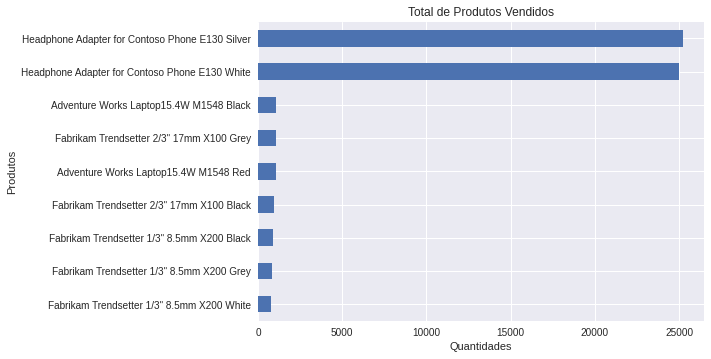

In [36]:
#Gráfico do Total de produtos vendidos
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=True).plot.barh(title="Total de Produtos Vendidos")
plt.xlabel("Quantidades")
plt.ylabel("Produtos");

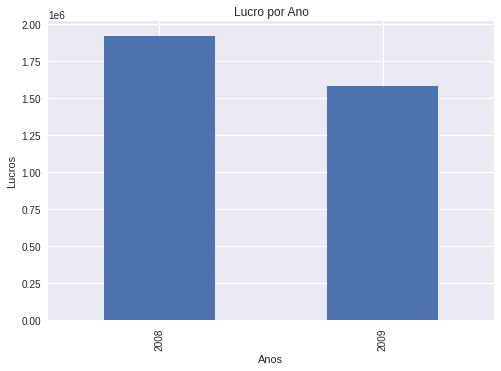

In [37]:
#Gráfico do Lucro por ano
df.groupby(df["Data Venda"].dt.year)["lucro"].sum().plot.bar(title="Lucro por Ano")
plt.xlabel("Anos")
plt.ylabel("Lucros");

In [38]:
#Alterando a forma da visualização da apresentação do lucro (Retirando a notação científica)
df.groupby(df["Data Venda"].dt.year)["lucro"].sum()

Data Venda
2008           1,920,077.71
2009           1,577,745.38
Name: lucro, dtype: float64

In [39]:
#Selecionando as vendas para o ano de 2009
df_2009 = df[df["Data Venda"].dt.year == 2009]

In [41]:
#Conferindo a dimensão de tempo da variável df_2009
df_2009.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,Tempo_envio
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",11
13,2009-05-31,2009-06-12,306,384,19068,200905313CS748,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
14,2009-06-28,2009-07-11,199,384,18959,200906283CS870,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",13
15,2009-07-08,2009-07-12,306,384,19070,200907083CS757,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",4


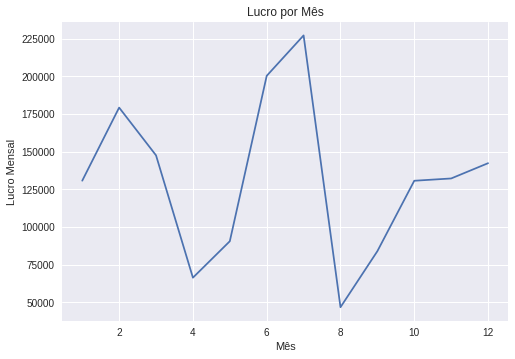

In [42]:
df_2009.groupby(df_2009["Data Venda"].dt.month)["lucro"].sum().plot(title="Lucro por Mês")
plt.xlabel("Mês")
plt.ylabel("Lucro Mensal");

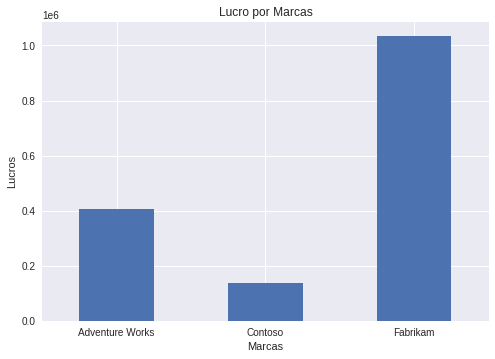

In [43]:
#Calculando o lucro por marcas para o ano de 2009 em um gráfico de barras
df_2009.groupby("Marca")["lucro"].sum().plot.bar(title="Lucro por Marcas")
plt.xlabel("Marcas")
plt.ylabel("Lucros")
plt.xticks(rotation='horizontal');

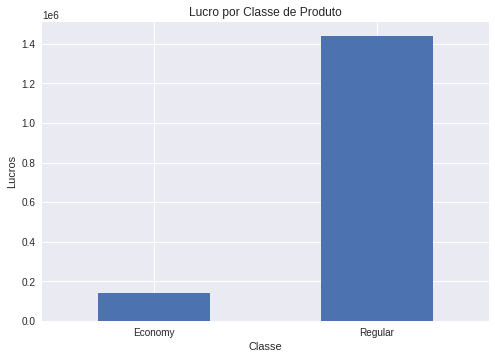

In [44]:
#Calculando o lucro por classe de produto para o ano de 2009 em um gráfico de barras
df_2009.groupby("Classe")["lucro"].sum().plot.bar(title="Lucro por Classe de Produto")
plt.xlabel("Classe")
plt.ylabel("Lucros")
plt.xticks(rotation='horizontal');

In [45]:
df["Tempo_envio"].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo_envio, dtype: float64

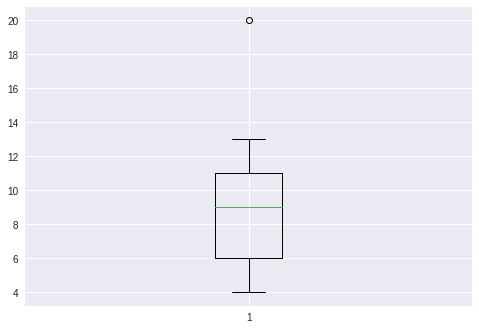

In [46]:
#Fazendo um gráfico tipo Box Plot para a variável tempo de envio
plt.boxplot(df["Tempo_envio"]);

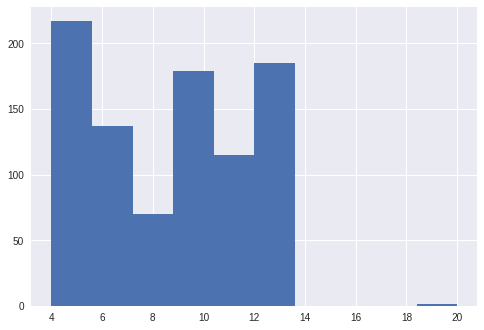

In [47]:
#Histograma em relação a variável tempo de envio
plt.hist(df["Tempo_envio"]);

In [48]:
#Tempo mínimo de envio
df["Tempo_envio"].min()

4

In [50]:
#Tempo máximo de envio
df["Tempo_envio"].max()

20

In [51]:
#Identificando o Outlier para verificação das causas possíveis desse evento
df[df["Tempo_envio"] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [52]:
#Salvando o trabalho em csv (novo nome df_vendas_novo.csv). Index=False para não levar o index de linhas. O arquivo fica salvo no drive.
df.to_csv("df_vendas_novo.csv", index=False)